In [160]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [161]:
# Read the datafile "covid.csv"
df = pd.read_csv('covid.csv')

# Take a quick look at the dataframe
df.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [162]:
# Check if there are any missing or Null values
df.isna()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
996,False,False,False,True,False,False,True,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False
999,True,False,False,False,False,False,False,False,False


In [163]:
### edTest(test_na) ###

# Find the number of rows with missing values
num_null = df.isna().any(axis=1).sum()
print("Number of rows with null values:", num_null)


Number of rows with null values: 37


In [164]:
# kNN impute the missing data
# Use a k value of 5
X = df.drop('Urgency', axis=1)
y = df['Urgency']
Imputer = KNNImputer(n_neighbors = 5)
X_imputed = Imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
df_imputed = pd.concat([X_imputed, y], axis=1)
# Your code here


In [165]:
### edTest(test_impute) ###
# Replace the original dataframe with the imputed data, continue to use df for the dataframe

# Your code here
df = df_imputed

## EDA

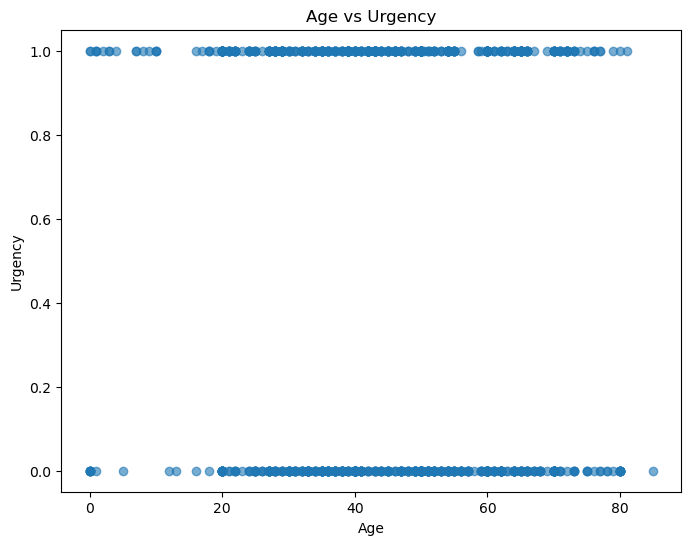

In [166]:
# Plot an appropriate graph to answer the following question
# Your code here

plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['Urgency'], alpha=0.6)
plt.title('Age vs Urgency')
plt.xlabel('Age')
plt.ylabel('Urgency')
plt.show()


### ⏸ Which age group has the most urgent need for a hospital bed?

#### A. 60 - 70 

#### B. 50 - 60 

#### C. 20 - 30

#### D. 40 - 50

In [167]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'


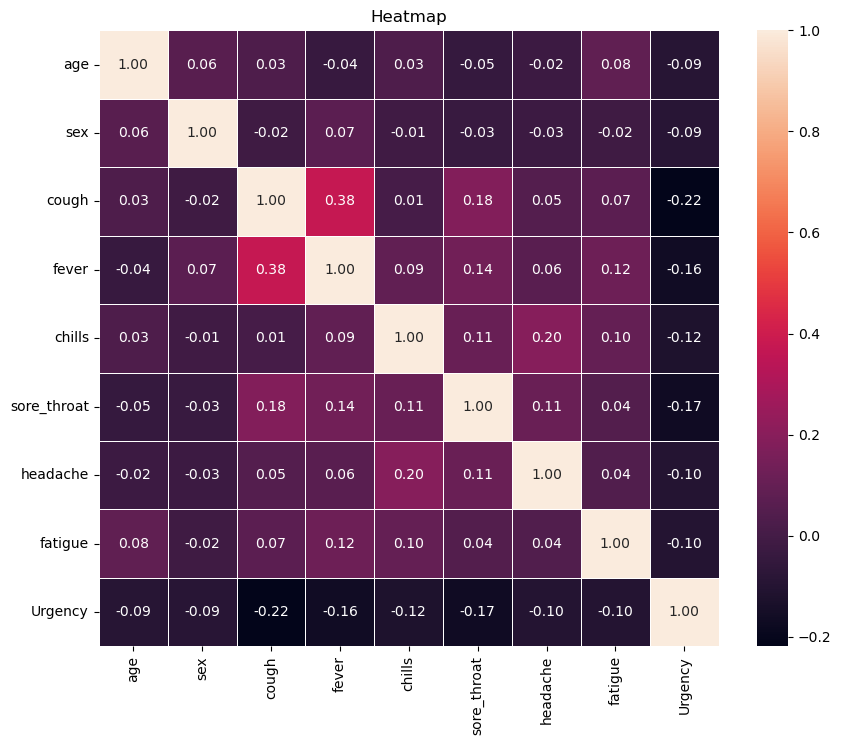

In [168]:
# Plot an appropriate graph to answer the following question    
# Your code here

import seaborn as sns

# Calculate correlation matrix
corr = df.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap')
plt.show()

### ⏸ Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?

#### A. Cough

#### B. Fever

#### C. Sore Throat

#### D. Fatigue

In [169]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'


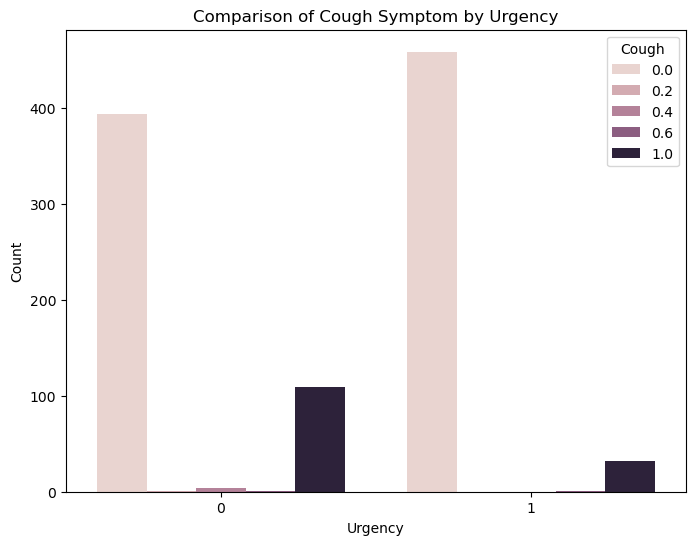

In [170]:
# Plot an appropriate graph to answer the following question    
# Your code here

plt.figure(figsize=(8, 6))
sns.countplot(x='Urgency', hue='cough', data=df)

plt.title('Comparison of Cough Symptom by Urgency')
plt.xlabel('Urgency')
plt.ylabel('Count')
plt.legend(title='Cough', loc='upper right')

plt.show()

### ⏸ As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?

#### A. True

#### B. False

#### C. It is the same

#### D. Cannot say

In [171]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'A'


### Train Test Split

In [172]:
### edTest(test_split) ###
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split
# Your code here
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 60)

In [173]:
# Save the train data into a csv called "covid_train.csv"
# Remember to not include the default indices
df_train.to_csv("covid_train.csv", index=False)

# Save the test data into a csv called "covid_test.csv"
# Remember to not include the default indices
df_test.to_csv("covid_test.csv", index=False)
